<a href="https://colab.research.google.com/github/JTenaSan/CS3120_EDA_Jesus-Tena/blob/main/Spotify_EDA_Jesus_Tena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import kagglehub

# Download latest version
path = kagglehub.dataset_download("irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023")
print("Path to dataset files:", path)

# Check if the downloaded folder exists
if os.path.exists(path):
    # List the files in the downloaded folder
    files = os.listdir(path)
    print("Files in the downloaded folder:", files)

    # Find the CSV file
    csv_file = next((f for f in files if f.endswith('.csv')), None)

    if csv_file:
        file_path = os.path.join(path, csv_file)  # Use the found CSV file
        df = pd.read_csv(file_path)
    else:
        print("CSV file not found in the downloaded folder.")
else:
    print("Downloaded folder not found.")

100%|██████████| 425k/425k [00:00<00:00, 57.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023/versions/1
Files in the downloaded folder: ['spotify_full_list_20102023.csv']


In [2]:
print(df.columns)
df['year'] = df['year'].astype(int)
new_df = df.copy().sort_values(by='Streams', ascending=False)
print(df.shape)
df.head(10)
new_df.head(10)

Index(['Unnamed: 0', 'Artist and Title', 'Artist', 'Streams', 'Daily', 'year',
       'main_genre', 'genres', 'first_genre', 'second_genre', 'third_genre'],
      dtype='object')
(10441, 11)


,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
7444,8168,The Weeknd - Blinding Lights,The Weeknd,4387731728,1640271,2020,R&B/Soul,"['canadian contemporary r&b', 'canadian pop', ...",canadian contemporary r&b,canadian pop,pop
548,548,Ed Sheeran - Shape of You,Ed Sheeran,3973446189,1036792,2017,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
8444,9168,Lewis Capaldi - Someone You Loved,Lewis Capaldi,3522436549,1564116,2018,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
4073,4285,Harry Styles - As It Was,Harry Styles,3471556211,1715525,2022,Pop,['pop'],pop,Unknown,Unknown
8445,9169,Post Malone - Sunflower,Post Malone,3453846546,1413028,2018,Hip-Hop/Rap,"['dfw rap', 'melodic rap', 'pop', 'rap']",dfw rap,melodic rap,pop
5767,6490,The Weeknd - Starboy,The Weeknd,3401512331,1695909,2016,R&B/Soul,"['canadian contemporary r&b', 'canadian pop', ...",canadian contemporary r&b,canadian pop,pop
5768,6491,Drake - One Dance,Drake,3280298923,1411518,2016,Hip-Hop/Rap,"['canadian hip hop', 'canadian pop', 'hip hop'...",canadian hip hop,canadian pop,hip hop
3074,3075,The Kid LAROI - STAY,The Kid LAROI,3202673861,1534512,2021,Hip-Hop/Rap,['australian hip hop'],australian hip hop,Unknown,Unknown
9441,20616,Tones And I - Dance Monkey,Tones And I,3112873889,731006,2019,Pop,['australian pop'],australian pop,Unknown,Unknown
549,549,Imagine Dragons - Believer,Imagine Dragons,3083580989,1142869,2017,Rock,"['modern rock', 'pop', 'rock']",modern rock,pop,rock


Just checking to make sure data was downloaded from Kaggle correctly and changing year which was at first a float to an int to be able to split data better in later cells.

As well as seeing the Top 10 most streamed songs within the entire data set

#Data Overview

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        10441 non-null  int64 
 1   Artist and Title  10441 non-null  object
 2   Artist            10441 non-null  object
 3   Streams           10441 non-null  int64 
 4   Daily             10441 non-null  int64 
 5   year              10441 non-null  int64 
 6   main_genre        10110 non-null  object
 7   genres            10110 non-null  object
 8   first_genre       10110 non-null  object
 9   second_genre      10110 non-null  object
 10  third_genre       10110 non-null  object
dtypes: int64(4), object(7)
memory usage: 897.4+ KB
None
         Unnamed: 0       Streams         Daily          year
count  10441.000000  1.044100e+04  1.044100e+04  10441.000000
mean    6608.185231  3.388738e+08  1.557488e+05   2017.671487
std     5535.517774  3.540370e+08  2.177395e+05   

According to the info displayed above there are 331 missing values in all the genre sections (i.e., in the main, first, second, and third genres).

This does not neccessarily mean we should get rid of the data since it could be a way of saying that the data/song may just have one genre it is associated with.

Possibly no need to clean/get rid of the columns with Unknown or are null.

#Data Splits

I am splitting the data based on years since it would be a lot of work to do it between each year i will split it between years 2010-2014, 2015-2019, and 2020-2023. This means popularity is based on total number of 'Streams' within the 5 year split.

In [ ]:
year_2010_2014 = df[df['year'].between(2010, 2014)]
year_2010_2014.shape
year_2010_2014.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
1,1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
2,2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014,Pop,['pop soul'],pop soul,Unknown,Unknown
3,3,Sam Smith - I'm Not The Only One,Sam Smith,1926711475,791299,2014,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
4,4,Maroon 5 - Sugar,Maroon 5,1877824112,552959,2014,Pop,['pop'],pop,Unknown,Unknown


In [ ]:
year_2015_2019 = df[df['year'].between(2015, 2019)]
year_2015_2019.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
548,548,Ed Sheeran - Shape of You,Ed Sheeran,3973446189,1036792,2017,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
549,549,Imagine Dragons - Believer,Imagine Dragons,3083580989,1142869,2017,Rock,"['modern rock', 'pop', 'rock']",modern rock,pop,rock
550,550,Ed Sheeran - Perfect,Ed Sheeran,3040567433,1129541,2017,Pop,"['pop', 'singer-songwriter pop', 'uk pop']",pop,singer-songwriter pop,uk pop
551,551,The Chainsmokers - Something Just Like This,The Chainsmokers,2700037974,1506504,2017,Pop,['pop'],pop,Unknown,Unknown
552,552,Imagine Dragons - Thunder,Imagine Dragons,2449303168,953367,2017,Rock,"['modern rock', 'pop', 'rock']",modern rock,pop,rock


In [ ]:
year_2020_2023 = df[df['year'].between(2020, 2023)]
year_2020_2023.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
3074,3075,The Kid LAROI - STAY,The Kid LAROI,3202673861,1534512,2021,Hip-Hop/Rap,['australian hip hop'],australian hip hop,Unknown,Unknown
3075,3076,Olivia Rodrigo - drivers license,Olivia Rodrigo,2238347845,811066,2021,Pop,['pop'],pop,Unknown,Unknown
3076,3077,Olivia Rodrigo - good 4 u,Olivia Rodrigo,2219060430,761712,2021,Pop,['pop'],pop,Unknown,Unknown
3077,3078,Maroon 5 - Memories,Maroon 5,2049491364,685858,2021,Pop,['pop'],pop,Unknown,Unknown
3078,3079,Lil Nas X - INDUSTRY BABY,Lil Nas X,2043454135,407835,2021,Hip-Hop/Rap,['lgbtq+ hip hop'],lgbtq+ hip hop,Unknown,Unknown


In [ ]:
dif_2010_2014 = year_2010_2014['Streams'].max() - year_2010_2014['Streams'].min()
dif_2015_2019 = year_2015_2019['Streams'].max() - year_2015_2019['Streams'].min()
dif_2020_2023 = year_2020_2023['Streams'].max() - year_2020_2023['Streams'].min()
print(dif_2010_2014, dif_2015_2019, dif_2020_2023)

2972612233 3873273984 4287648266


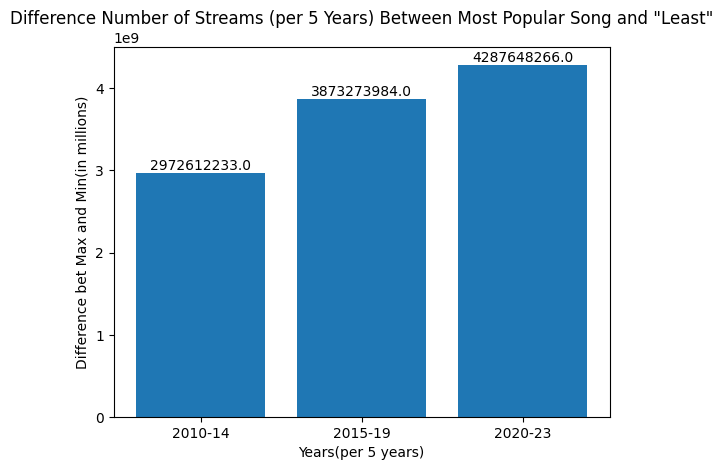

In [ ]:
total_dif_max_min = [dif_2010_2014, dif_2015_2019, dif_2020_2023]
categories = ['2010-14', '2015-19', '2020-23']
bars = plt.bar(categories, total_dif_max_min)
plt.xlabel('Years(per 5 years)')
plt.ylabel('Difference bet Max and Min(in billions)')
plt.title('Difference Number of Streams (per 5 Years) Between Most Popular Song and "Least"')
for bar in bars:
    height = bar.get_height()  # Get the height (value) of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom')  # Position text at the top of the bar

Differences between max number of streams and min number of streams.

In [ ]:
tenth_largest_value_2010_2014 = year_2010_2014['Streams'].nlargest(10).iloc[-1]
tenth_largest_value_2015_2019 = year_2015_2019['Streams'].nlargest(10).iloc[-1]
tenth_largest_value_2020_2023 = year_2020_2023['Streams'].nlargest(10).iloc[-1]
dif_max_tenth_2010_2014 = year_2010_2014['Streams'].max() - tenth_largest_value_2010_2014
dif_max_tenth_2015_2019 = year_2015_2019['Streams'].max() - tenth_largest_value_2015_2019
dif_max_tenth_2020_2023 = year_2020_2023['Streams'].max() - tenth_largest_value_2020_2023
print(dif_max_tenth_2010_2014, dif_max_tenth_2015_2019, dif_max_tenth_2020_2023)

722743386 1029973709 2338240364


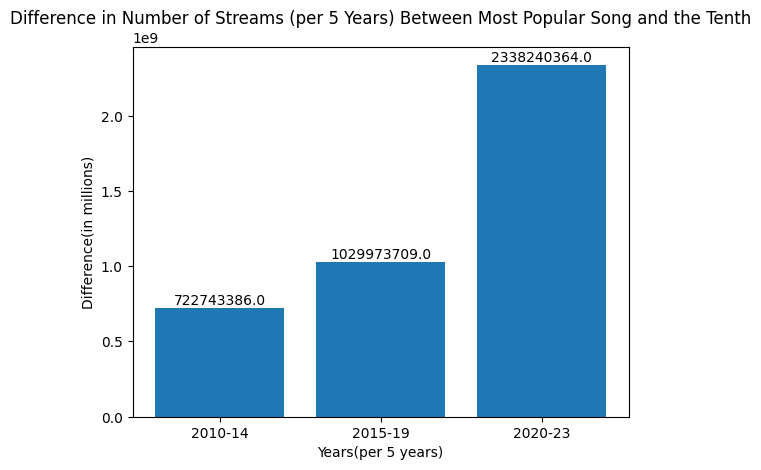

In [ ]:
total_dif_bet_max_tenth = [dif_max_tenth_2010_2014, dif_max_tenth_2015_2019, dif_max_tenth_2020_2023]
categories = ['2010-14', '2015-19', '2020-23']
bars = plt.bar(categories, total_dif_bet_max_tenth)
for bar in bars:
    height = bar.get_height()  # Get the height (value) of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom')  # Position text at the top of the bar
plt.xlabel('Years(per 5 years)')
plt.ylabel('Difference(in billions)')
plt.title('Difference in Number of Streams (per 5 Years) Between Most Popular Song and the Tenth')
plt.show()

# Average Number of Streams

In [ ]:
# Mean for 2010-14
mean_2010_2014 = year_2010_2014['Streams'].mean()
mean_2010_2014 = round(mean_2010_2014, 4)

# Mean for 2015-19
mean_2015_2019 = year_2015_2019['Streams'].mean()
mean_2015_2019 = round(mean_2015_2019, 4)

# Mean for 2020-23
mean_2020_2023 = year_2020_2023['Streams'].mean()
mean_2020_2023 = round(mean_2020_2023, 4)
print(mean_2010_2014, mean_2015_2019, mean_2020_2023)

343182488.1321 372467607.0901 293936424.4882


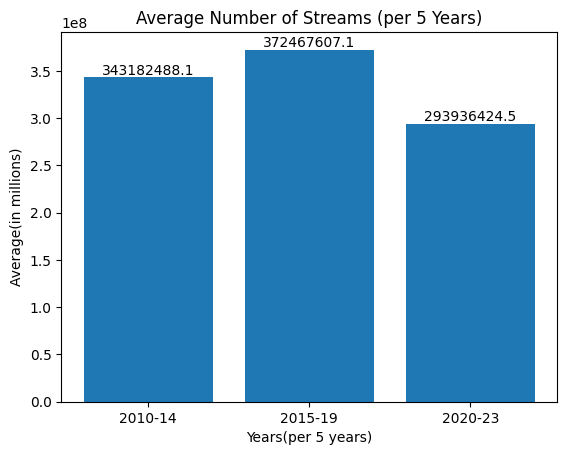

In [ ]:
total_means = [mean_2010_2014, mean_2015_2019, mean_2020_2023]
categories = ['2010-14', '2015-19', '2020-23']
bars = plt.bar(categories, total_means)
for bar in bars:
    height = bar.get_height()  # Get the height (value) of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom')  # Position text at the top of the bar
plt.xlabel('Years(per 5 years)')
plt.ylabel('Average(in millions)')
plt.title('Average Number of Streams (per 5 Years)')
plt.show()

Showing the quartiles, mean, and median of the split data

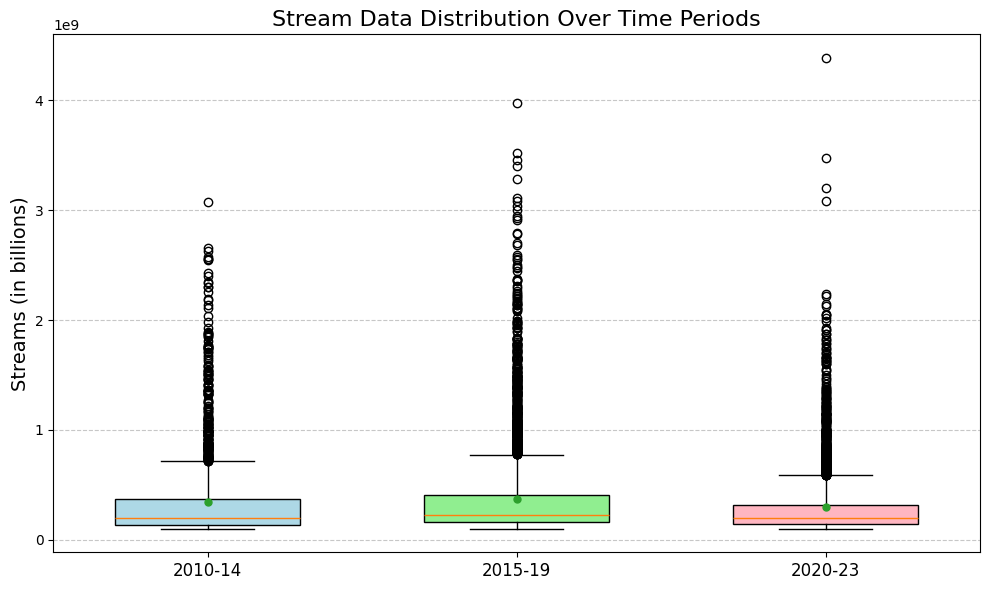

In [ ]:
box_categ = [year_2010_2014['Streams'], year_2015_2019['Streams'], year_2020_2023['Streams']]
#fig, ax = plt.subplots()
#ax.boxplot(box_categ)
#ax.set_xticklabels(['2010-14', '2015-19', '2020-23'])
#ax.set_ylabel('Streams')

# Enhance the boxplot visualization
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Create the boxplot with enhancements
box = ax.boxplot(box_categ,
                 patch_artist=True,  # Allows color filling
                 showmeans=True,  # Display the mean as a point
                 widths=0.6)  # Adjust the box widths

# Custom colors for each box
colors = ['lightblue', 'lightgreen', 'lightpink']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color)

# Customize the mean
for mean in box['means']:
    mean.set(color='red', marker='o', markersize=5)

# Customize the grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set titles and labels
ax.set_title("Stream Data Distribution Over Time Periods", fontsize=16)
ax.set_xticklabels(['2010-14', '2015-19', '2020-23'], fontsize=12)
ax.set_ylabel("Streams (in billions)", fontsize=14)

# Use scientific notation or adjust y-axis scale
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

# Add more spacing to the layout
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
# All 5 quartiles for the 2010-14
min_2010_14 = year_2010_2014['Streams'].min()
q1_2010_14 = year_2010_2014['Streams'].quantile(0.25)
q2_2010_14 = year_2010_2014['Streams'].quantile(0.5)
q3_2010_14 = year_2010_2014['Streams'].quantile(0.75)
max_2010_14 = year_2010_2014['Streams'].max()
print(min_2010_14, q1_2010_14, q2_2010_14, q3_2010_14, max_2010_14)

100152456 137200000.25 201817466.5 368428129.0 3072764689


Min - **100152456**

25% - **137200000**

Median - **201817466**

75% - **368428129**

Max - **3072764689**

In [ ]:
# All 5 quartiles for the 2015-19
min_2015_19 = year_2015_2019['Streams'].min()
q1_2015_19 = year_2015_2019['Streams'].quantile(0.25)
q2_2015_19 = year_2015_2019['Streams'].quantile(0.5)
q3_2015_19 = year_2015_2019['Streams'].quantile(0.75)
max_2015_19 = year_2015_2019['Streams'].max()
print(min_2015_19, q1_2015_19, q2_2015_19, q3_2015_19, max_2015_19)

100172205 162063889.75 228925172.5 407714450.25 3973446189


Min - **100172205**

25% - **162063889**

Median - **228925172**

75% - **407714450**

Max - **3973446189**

In [ ]:
# All 5 quartiles for the 2020-23
min_2020_23 = year_2020_2023['Streams'].min()
q1_2020_23 = year_2020_2023['Streams'].quantile(0.25)
q2_2020_23 = year_2020_2023['Streams'].quantile(0.5)
q3_2020_23 = year_2020_2023['Streams'].quantile(0.75)
max_2020_23 = year_2020_2023['Streams'].max()
print(min_2020_23, q1_2020_23, q2_2020_23, q3_2020_23, max_2020_23)

100083462 142987256.0 193443154.0 320601976.0 4387731728


Min - **100083462**

25% - **142987256**

Median - **193443154**

75% - **320601976**

Max - **4387731728**

# Top Streams and Artists

Top Artists and the amount of times the song was streamed

In [ ]:
artist_2010_2014 = year_2010_2014[['Artist and Title', 'Streams']].sort_values(by='Streams', ascending=False)
artist_2010_2014.head(10)

,Artist and Title,Streams
1866,The Neighbourhood - Sweater Weather,3072764689
2270,Vance Joy - Riptide,2652765174
2271,Hozier - Take Me to Church,2631764568
2272,Ed Sheeran - Photograph,2575216556
1867,Tom Odell - Another Love,2560836740
2273,OneRepublic - Counting Stars,2555033521
2274,Ed Sheeran - Thinking out Loud,2542751447
2275,John Legend - All of Me,2432323264
2276,Avicii - Wake Me Up,2399378833
1868,Imagine Dragons - Demons,2350021303


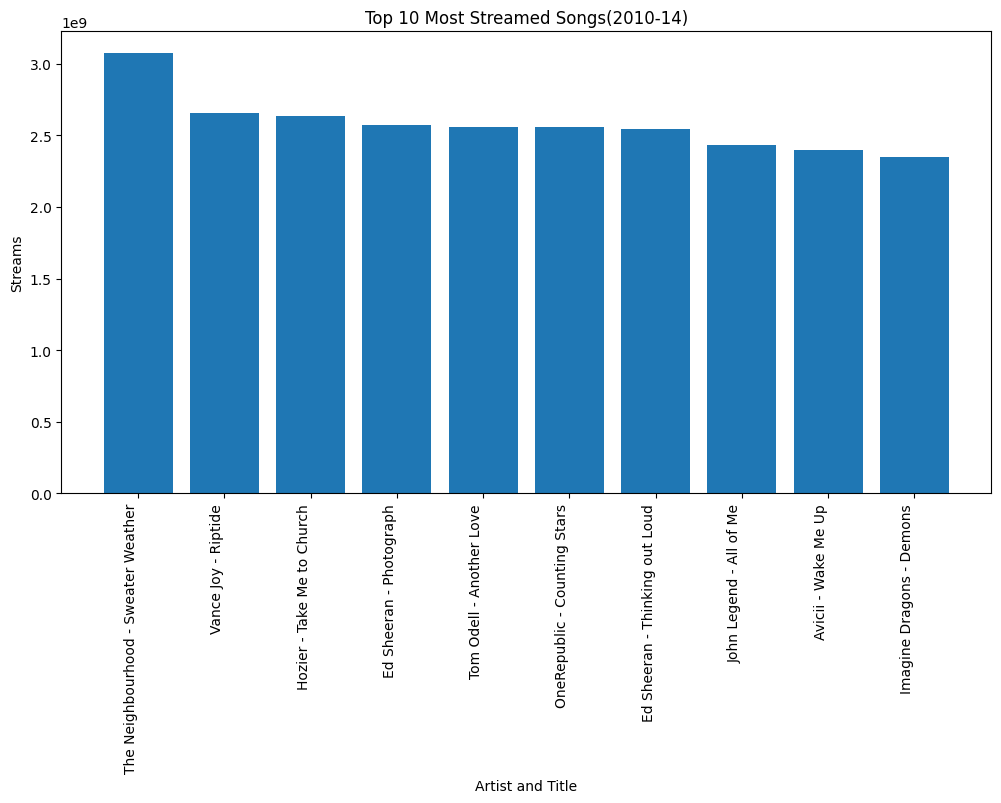

In [ ]:
# Sort by streams and take top 10
top_10_2010_14 = year_2010_2014.sort_values(by=['Streams'], ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_2010_14['Artist and Title'], top_10_2010_14['Streams'])
plt.title('Top 10 Most Streamed Songs(2010-14)')
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
_ = plt.xticks(rotation=90, ha='right')

In [ ]:
artist_2015_2019 = year_2015_2019[['Artist and Title', 'Streams']].sort_values(by='Streams', ascending=False)
artist_2015_2019.head(10)

,Artist and Title,Streams
548,Ed Sheeran - Shape of You,3973446189
8444,Lewis Capaldi - Someone You Loved,3522436549
8445,Post Malone - Sunflower,3453846546
5767,The Weeknd - Starboy,3401512331
5768,Drake - One Dance,3280298923
9441,Tones And I - Dance Monkey,3112873889
549,Imagine Dragons - Believer,3083580989
550,Ed Sheeran - Perfect,3040567433
8446,Post Malone - rockstar,3001051800
5769,The Chainsmokers - Closer,2943472480


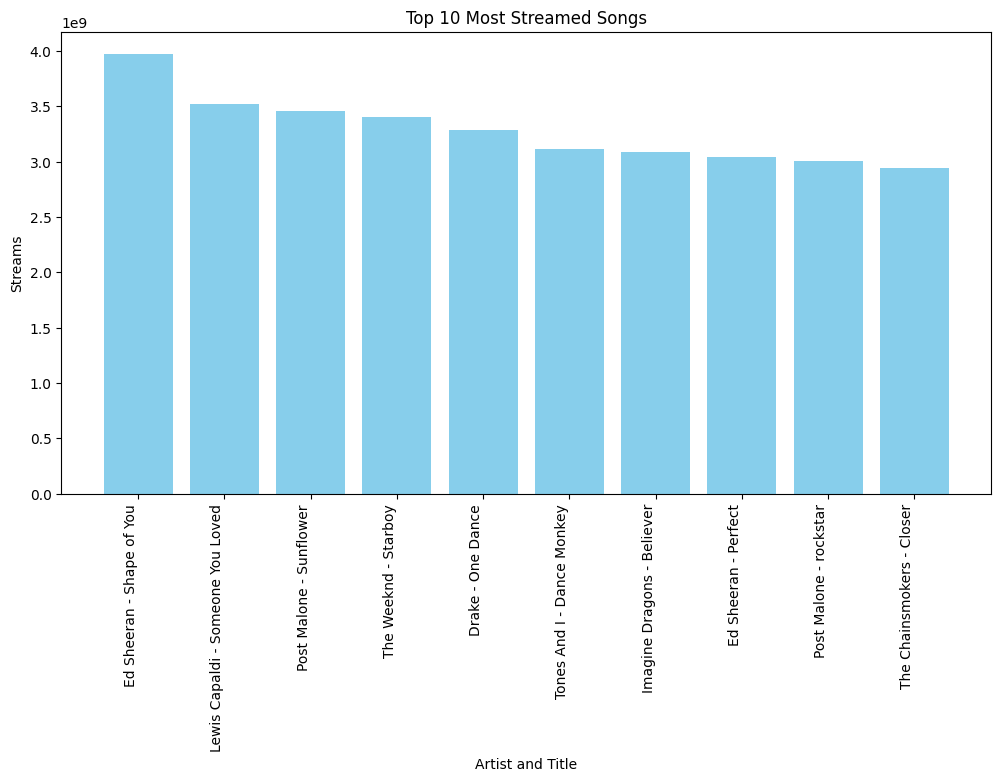

In [ ]:
top_10_2015_19 = year_2015_2019.sort_values('Streams', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_2015_19['Artist and Title'], top_10_2015_19['Streams'], color='skyblue')
plt.title('Top 10 Most Streamed Songs(2015-19)')
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
_ = plt.xticks(rotation=90, ha='right')

In [ ]:
artist_2020_2023 = year_2020_2023[['Artist and Title', 'Streams']].sort_values(by='Streams', ascending=False)
artist_2020_2023.head(10)

,Artist and Title,Streams
7444,The Weeknd - Blinding Lights,4387731728
4073,Harry Styles - As It Was,3471556211
3074,The Kid LAROI - STAY,3202673861
7445,Glass Animals - Heat Waves,3083042178
3075,Olivia Rodrigo - drivers license,2238347845
3076,Olivia Rodrigo - good 4 u,2219060430
4966,Miley Cyrus - Flowers,2147478869
7446,Dua Lipa - Levitating,2124904736
7447,The Weeknd - Save Your Tears,2058701767
3077,Maroon 5 - Memories,2049491364


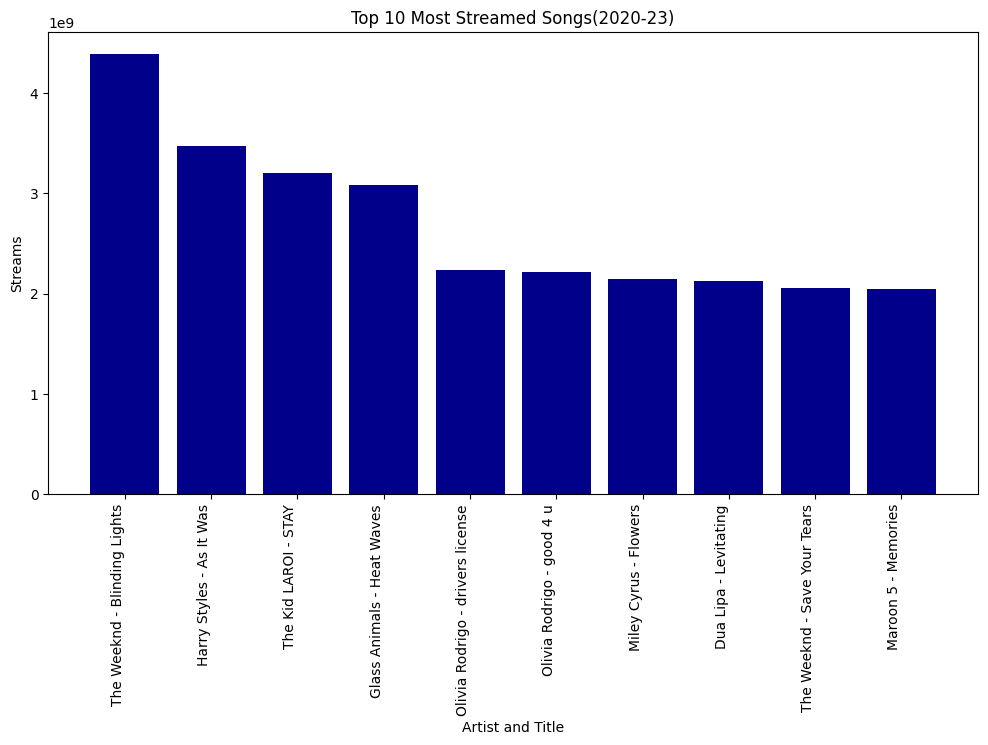

In [ ]:
top_10_2020_23 = year_2020_2023.sort_values('Streams', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_2020_23['Artist and Title'], top_10_2020_23['Streams'], color='darkblue')
plt.title('Top 10 Most Streamed Songs(2020-23)')
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
_ = plt.xticks(rotation=90, ha='right')

# Genres

In [ ]:
genre_2010_2014 = year_2010_2014['main_genre'].value_counts()
genre_2010_2014.head(15)

,count
main_genre,
Pop,853
Hip-Hop/Rap,345
World/Traditional,247
Rock,234
Electronic/Dance,160
R&B/Soul,61
Metal,57
Indie/Alternative,48
Other,30


In [ ]:
genre_2015_2019 = year_2015_2019['main_genre'].value_counts()
genre_2015_2019.head(15)

,count
main_genre,
Pop,1700
Hip-Hop/Rap,1332
World/Traditional,599
Electronic/Dance,297
Rock,202
R&B/Soul,194
Indie/Alternative,114
Metal,54
Classical/Orchestral,32


In [ ]:
genre_2020_2023 = year_2020_2023['main_genre'].value_counts()
genre_2020_2023.head(15)

,count
main_genre,
Pop,1283
Hip-Hop/Rap,985
World/Traditional,812
Electronic/Dance,166
R&B/Soul,121
Rock,65
Indie/Alternative,44
Other,22
Metal,14


Pop Songs seem to dominate the charts, while Hip-Hop/Rap are always in second

In [21]:
count = df['Artist'].value_counts().head(10)
print(count)

Artist
Taylor Swift     183
Drake            148
BTS              102
Bad Bunny         99
The Weeknd        80
Ariana Grande     69
Ed Sheeran        67
Post Malone       61
Lana Del Rey      59
Travis Scott      57
Name: count, dtype: int64


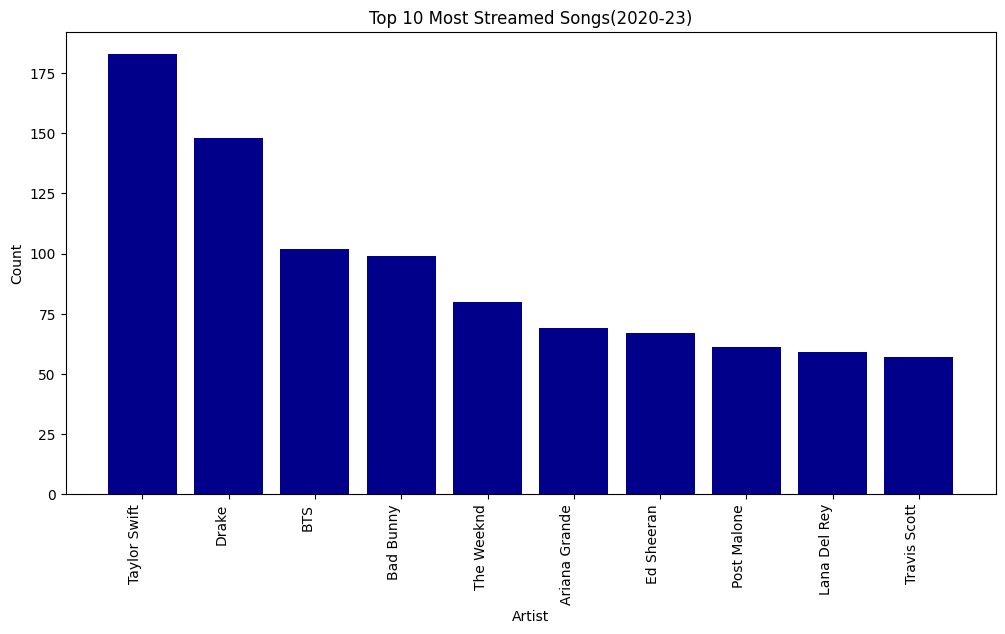

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(count.index, count.values, color='darkblue')
plt.title('Top 10 Most Streamed Songs(2020-23)')
plt.xlabel('Artist')
plt.ylabel('Count')
_ = plt.xticks(rotation=90, ha='right')

A visualization of the Top Ten Artists in the whole data set